In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured55r56y6y

In [20]:
df = pd.read_excel('data/text-preprocessing.xlsx')
df.head()

,Unnamed: 0,tweet_id,author_name,author_username,author_location,content,content_clean,like_count,retweet_count,reply_count,...,latitude,province,city,country,created_at,content_token,tweet_tokens_fdist,tweet_tokens_WSW,tweet_tokens_stemmed,tweet_tokens_stemmed_string
0,0,1.536196e+17,MariBerlomba,MariBerlomba,di dalam asa pemuda,"1. lomba poster ilmiah ""energi baru/terbarukan...",lomba poster ilmiah energi baru terbarukan dea...,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2012-01-01 23:32:20,"['lomba', 'poster', 'ilmiah', 'energi', 'baru'...",<FreqDist with 13 samples and 13 outcomes>,"['lomba', 'poster', 'ilmiah', 'energi', 'terba...","['lomba', 'poster', 'ilmiah', 'energi', 'baru'...",lomba poster ilmiah energi baru deadline janua...
1,1,1.538575e+17,vegaaulia,vegaaulia,"Bogor, Indonesia",elaahhh ini si bapak tiba2 ngomong soal energi...,elaahhh ini si bapak tiba ngomong soal energi ...,0.0,NaN,1.0,...,-6.596299,Jawa Barat,Kelurahan Pabaton,Indonesia,2012-01-02 15:17:39,"['elaahhh', 'ini', 'si', 'bapak', 'tiba', 'ngo...",<FreqDist with 13 samples and 13 outcomes>,"['elaahhh', 'ngomong', 'energi', 'terbarukan',...","['elaahhh', 'ngomong', 'energi', 'baru', 'tv',...",elaahhh ngomong energi baru tv biruu
2,2,1.543614e+17,enbater,enbater,Indonesia,masih banyak daerah terpencil membutuhkam list...,masih banyak daerah terpencil membutuhkam list...,0.0,NaN,NaN,...,-2.483383,Kalimantan Timur,NaN,Indonesia,2012-01-04 00:40:06,"['masih', 'banyak', 'daerah', 'terpencil', 'me...",<FreqDist with 13 samples and 13 outcomes>,"['daerah', 'terpencil', 'membutuhkam', 'listri...","['daerah', 'pencil', 'membutuhkam', 'listrik',...",daerah pencil membutuhkam listrik manfaat ener...
3,3,1.563972e+17,imronrosidin,imronrosidin,"ÜT: -6.895087,107.627799",gw kira kalo @provocactive gak tertarik dgn ma...,gw kira kalo gak tertarik dgn materi energi ba...,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,2012-01-09 15:29:37,"['gw', 'kira', 'kalo', 'gak', 'tertarik', 'dgn...",<FreqDist with 18 samples and 18 outcomes>,"['tertarik', 'materi', 'energi', 'terbarukan',...","['tarik', 'materi', 'energi', 'baru', 'baek', ...",tarik materi energi baru baek ganti nama propa...
4,4,1.569363e+17,revozone,revozone,Indonesia,satu lagi yang aneh. inget jatropa? alias miny...,satu lagi yang aneh inget jatropa alias minyak...,0.0,NaN,NaN,...,-2.483383,Kalimantan Timur,NaN,Indonesia,2012-01-11 03:11:53,"['satu', 'lagi', 'yang', 'aneh', 'inget', 'jat...",<FreqDist with 20 samples and 21 outcomes>,"['aneh', 'inget', 'jatropa', 'alias', 'minyak'...","['aneh', 'inget', 'jatropa', 'alias', 'minyak'...",aneh inget jatropa alias minyak jarak bbrp jat...


In [21]:
df.shape

(109705, 24)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109705 entries, 0 to 109704
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   109705 non-null  int64  
 1   tweet_id                     109705 non-null  float64
 2   author_name                  109705 non-null  object 
 3   author_username              109705 non-null  object 
 4   author_location              78272 non-null   object 
 5   content                      109705 non-null  object 
 6   content_clean                109437 non-null  object 
 7   like_count                   109604 non-null  float64
 8   retweet_count                17012 non-null   float64
 9   reply_count                  16620 non-null   float64
 10  source                       109705 non-null  object 
 11  keyword                      109705 non-null  object 
 12  address                      64928 non-null   object 
 13 

In [23]:
df_new = df[df['tweet_tokens_stemmed_string'].notnull()]

In [24]:
df_new['tweet_tokens_stemmed_string'].head()

0    lomba poster ilmiah energi baru deadline janua...
1                 elaahhh ngomong energi baru tv biruu
2    daerah pencil membutuhkam listrik manfaat ener...
3    tarik materi energi baru baek ganti nama propa...
4    aneh inget jatropa alias minyak jarak bbrp jat...
Name: tweet_tokens_stemmed_string, dtype: object

In [25]:
#lower text
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
df_new['tweet_tokens_stemmed_string'] = df_new['tweet_tokens_stemmed_string'].str.lower()


print('Case Folding Result : \n')
print(df_new['tweet_tokens_stemmed_string'].head(5))


Case Folding Result : 

0    lomba poster ilmiah energi baru deadline janua...
1                 elaahhh ngomong energi baru tv biruu
2    daerah pencil membutuhkam listrik manfaat ener...
3    tarik materi energi baru baek ganti nama propa...
4    aneh inget jatropa alias minyak jarak bbrp jat...
Name: tweet_tokens_stemmed_string, dtype: object


In [45]:
text = df_new['tweet_tokens_stemmed_string']
text_list =  [i.split() for i in text]
#text_list =  [i for i in text]
print(len(text_list))

AttributeError: 'FreqDist' object has no attribute 'split'

In [27]:
#di twitter, yg, dn, sy, -- > masukkan di stopwords, sastrawi buat stopwords 

In [28]:
#normalisasi : --> yg, dn, sy, dll. 

In [29]:
#https://yunusmuhammad007.medium.com/text-preprocessing-menggunakan-pandas-nltk-dan-sastrawi-untuk-large-dataset-5fb3c0a88571

In [30]:
#masi salah hasil frekuensi nya
# NLTK calc frequency distribution
from nltk.probability import FreqDist
def freqDist_wrapper(text):
    return FreqDist(text)

df_new['tweet_tokens_stemmed_string'] = df_new['tweet_tokens_stemmed_string'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
df_new['tweet_tokens_stemmed_string'].head().apply(lambda x : x.most_common())

Frequency Tokens : 



0    [( , 11), (a, 10), (e, 6), (i, 6), (s, 5), (r,...
1    [( , 5), (e, 3), (a, 3), (h, 3), (n, 3), (g, 3...
2    [(a, 7), ( , 6), (e, 5), (r, 4), (i, 4), (m, 4...
3    [(a, 10), ( , 8), (r, 5), (i, 5), (e, 4), (t, ...
4    [(a, 12), ( , 12), (r, 8), (e, 7), (b, 6), (i,...
Name: tweet_tokens_stemmed_string, dtype: object

In [31]:
#https://sites.unpad.ac.id/widodo/2021/03/09/nlp-dengan-python/

In [32]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [34]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<16354 unique tokens: ['deadline', 'derajat', 'ilmiah', 'januari', 'lomba']...>


In [35]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

109404
[(35, 1), (188, 1)]


In [36]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100, random_state=1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

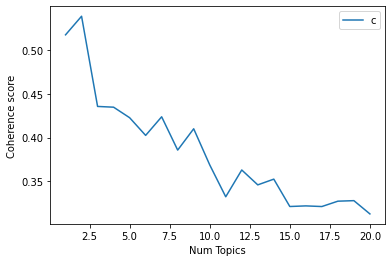

In [37]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [40]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.517
Num Topics = 2  has Coherence Value of 0.539
Num Topics = 3  has Coherence Value of 0.436
Num Topics = 4  has Coherence Value of 0.435
Num Topics = 5  has Coherence Value of 0.423
Num Topics = 6  has Coherence Value of 0.402
Num Topics = 7  has Coherence Value of 0.424
Num Topics = 8  has Coherence Value of 0.386
Num Topics = 9  has Coherence Value of 0.41
Num Topics = 10  has Coherence Value of 0.369
Num Topics = 11  has Coherence Value of 0.332
Num Topics = 12  has Coherence Value of 0.363
Num Topics = 13  has Coherence Value of 0.346
Num Topics = 14  has Coherence Value of 0.352
Num Topics = 15  has Coherence Value of 0.321
Num Topics = 16  has Coherence Value of 0.322
Num Topics = 17  has Coherence Value of 0.321
Num Topics = 18  has Coherence Value of 0.327
Num Topics = 19  has Coherence Value of 0.328
Num Topics = 20  has Coherence Value of 0.313


In [41]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=9) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    # yg belum remove Yang, yg,trus lower text

Topic: 0 Word: 0.032*"panas_bumi" + 0.012*"bumi" + 0.011*"indonesia" + 0.011*"panas" + 0.010*"atur" + 0.010*"laku" + 0.010*"milik_potensi" + 0.009*"potensi" + 0.009*"kembang" + 0.009*"mobil_listrik"
Topic: 1 Word: 0.145*"pln_id" + 0.062*"id" + 0.041*"pln" + 0.023*"kapasitas" + 0.020*"cepat" + 0.019*"moga" + 0.012*"siap" + 0.011*"wilayah" + 0.011*"sepakat" + 0.008*"solar_panel"
Topic: 2 Word: 0.022*"baur" + 0.021*"target_baur" + 0.019*"wujud" + 0.014*"tambah" + 0.013*"renewable_energy" + 0.013*"capai_persen" + 0.012*"tambah_kapasitas" + 0.011*"mahal" + 0.010*"realisasi" + 0.010*"micho"
Topic: 3 Word: 0.037*"capai_target" + 0.025*"target" + 0.022*"kejar_target" + 0.020*"bumn" + 0.020*"erick_thohir" + 0.018*"capai" + 0.018*"plta" + 0.017*"sobat" + 0.017*"pln" + 0.016*"net_zero"
Topic: 4 Word: 0.035*"bangkit_listrik" + 0.024*"bangkit" + 0.018*"transisi" + 0.017*"listrik" + 0.013*"plta_poso" + 0.011*"pln" + 0.009*"bangun" + 0.008*"kembang" + 0.008*"ekspor" + 0.008*"indonesia"
Topic: 5 Word:

In [42]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 5)]) #ubah2 yg ini
# df=pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_topic_20.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_excel("data/lda_model.xlsx")
print(df)


None


In [43]:
#ini dilakukan jika module belum tersedia
!pip install pyLDAvis
#!apt-get -qq install -y pyLDAvis

In [44]:
#import gensim
import pyLDAvis
import pyLDAvis.gensim_models;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'data/lda-gensim_clean_kualitatif.html')

/Users/indralionardy/Personal/sara/tugas-akhir/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/indralionardy/Personal/sara/tugas-akhir/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/indralionardy/Personal/sara/tugas-akhir/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/indralionardy/Personal/sara/tugas-akhir/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.167327 -0.013103       1        1  15.838452
2     -0.173564 -0.174670       2        1  14.442845
8      0.106711 -0.177485       3        1  11.800373
7      0.113467 -0.056304       4        1  11.564917
0      0.086653  0.005196       5        1  11.423722
3      0.106898  0.161400       6        1   9.461336
6      0.036269  0.094960       7        1   9.212051
1     -0.187594  0.248562       8        1   8.446417
5     -0.256168 -0.088557       9        1   7.809887, topic_info=                 Term         Freq        Total Category  logprob  loglift
7140           pln_id  3332.000000  3332.000000  Default  30.0000  30.0000
828      tenaga_surya  1523.000000  1523.000000  Default  29.0000  29.0000
357      menteri_esdm  1559.000000  1559.000000  Default  28.0000  28.0000
443                id  1476.000000  1476.000000  Default  27.00

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/lda-gensim_clean_kualitatif1.html'